# Simulation of Thermalization in an Oscillating Particle: A Thermal Physics Project
> Alfaifi, Ammar -- 201855360




Thermalization is a fundamental concept in thermal physics, describing the process by which a system reaches thermal equilibrium with its surroundings. Understanding and studying thermalization is crucial for various scientific fields, including condensed matter physics, statistical mechanics, and quantum mechanics.

In this thermal physics project, we focus on simulating the thermalization of an oscillating particle. The project aims to investigate how an oscillating particle interacts with a heat reservoir and eventually reaches a state of thermal equilibrium.

The simulation utilizes numerical methods and Monte Carlo techniques to model the energy exchange between the oscillating particle and the heat reservoir. By incorporating principles from statistical mechanics, we can gain insights into the relaxation dynamics and energy distribution of the particle as it undergoes thermalization.

The project involves several key steps. Initially, we define the parameters, such as the number of particles in the reservoir, the temperature of the heat bath, and the amplitude of the particle's oscillation. These parameters play crucial roles in shaping the thermalization process.

Through a series of computational iterations, we simulate the interactions between the oscillating particle and the reservoir. At each time step, energy exchanges occur, influenced by random fluctuations, allowing the particle to reach a state of thermal equilibrium. We monitor the evolution of the energy distribution and observe how it converges towards the distribution dictated by the heat reservoir's temperature.

To visualize and analyze the thermalization process, we create an animation that showcases the changing energy distribution over time. By observing the animation and analyzing statistical properties, we gain a deeper understanding of the mechanisms underlying thermalization and the 

## Setup the Python packages

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import constants as con
from matplotlib_inline.backend_inline import set_matplotlib_formats

set_matplotlib_formats('pdf')
plt.rcParams |= {
    'text.usetex': True,
    'figure.figsize': (10, 4)
}
sns.set_theme()
set_matplotlib_formats('svg', 'pdf')

Assume two particle particle one has a mass of $m_1$, and the other with much smmaller mass of $m_2$

In [116]:
m2 = 1.00784 * con.u # He mass
m1 = 10 * m2
omega = 2 * np.pi * 1.
k = omega**2 * m1

We define the wall's particle speed as a simple harmonic motion model. With the equation
$$
    v = -  A\omega \sin{(\omega t)}
$$
where $A$ is the position amplitude and $t$ is the time, would be random generated.
Which is the derivative of the position sinesoidal function
$$
 x = A \cos{(\omega t)}
$$

In [ ]:
def v1(t, amp=1):
    return - amp * omega * np.sin(omega * np.random.rand())

For collision of the particle in the box with the oscillating particle in the wall, we assume a ellastic collision, momentum and kinetic energy is conserved. The by solving the law of onservation of momentum with that of kinetic energy we get the velocity of the particle after collision as 
$$
    v_{2f} = \frac{2 m_1}{m_1 + m_2} v_1 - \frac{m_1 - m_2}{m_1+m_2} v_2
$$

In [ ]:
def v2_after(v1, v2):
    """Final velocity of particle 2 after collision
    with particle 1."""
    return 2*m1 / (m1+m2) * v1 - (m1-m2) / (m1+m2) * v2

This is to calculate the temperature using the kinetic theroy of gases,
$$
    T = \frac{m \bar{v^2}}{3 k_B}
$$

In [45]:
def temp(v):
    return m2 * v**2 / (3 * con.k)

## Demostrating Thermalization
### The Stablization of Speed

Avg energy is 4.7842078749270404e-05 eV
Total energy is 5.154660235528863e-05 eV


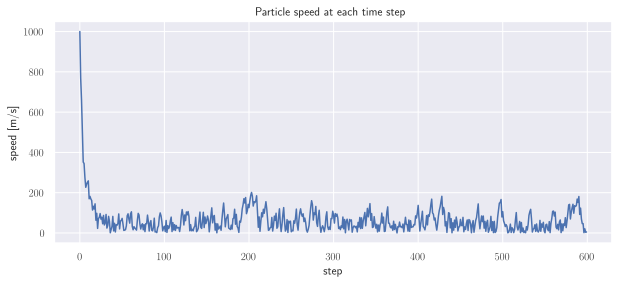

In [117]:
steps = 600
A = 5
velocities = np.zeros(steps)
osc_velocities = np.zeros(steps)
time = np.arange(steps)
# initial speed
velocities[0] = 1000

for i in time[1:]:
    osc_velocities[i] = v1(i, A)
    velocities[i] = v2_after(osc_velocities[i], velocities[i-1])

avg_speed = abs(velocities[300:]**2).sum() / len(velocities[300:])
print(f'Avg energy is {m2 * velocities[300:].var() / con.e} eV')
print(f'Total energy is {0.5* k*A**2 / con.e} eV')

plt.plot(time, abs(velocities))
plt.title("Particle speed at each time step")
plt.xlabel('step')
plt.ylabel('speed [m/s]')
plt.show()

In [103]:
velocities[300:].var()**.5, osc_velocities.var()**.5, osc_velocities.sum()/len(osc_velocities)

(7.548009169883787, 2.198988449535845, 0.07424292776562948)

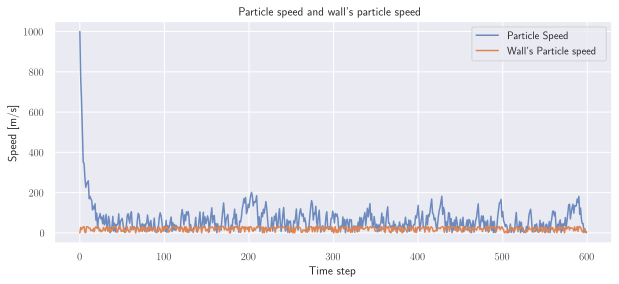

In [121]:
plt.plot(time, abs(velocities), label='Particle Speed', alpha=0.8)
plt.plot(time, abs(osc_velocities), label="Wall's Particle speed")
plt.title("Particle speed and wall's particle speed")
plt.xlabel("Time step")
plt.ylabel("Speed [m/s]")
plt.legend()
plt.show()

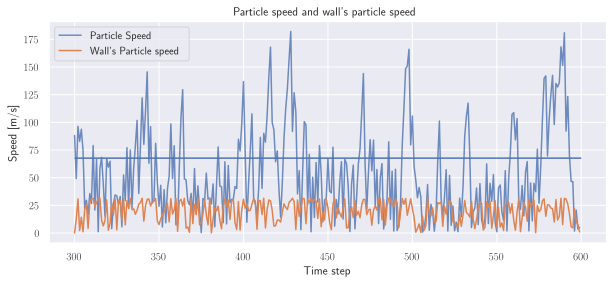

In [118]:
plt.plot(time[300:], abs(velocities[300:]), label='Particle Speed', alpha=0.8)
plt.plot(time[300:], abs(osc_velocities[300:]), label="Wall's Particle speed")
plt.hlines(velocities[300:].var()**.5, 300, 600)
plt.title("Particle speed and wall's particle speed")
plt.xlabel("Time step")
plt.ylabel("Speed [m/s]")
plt.legend()
plt.show()

### Reaching Equilibrium Temperature

In [77]:
print(f"Temperature of particle is {m2 * velocities[300:].var():0.3}, and temp of wall {0.5* k*A**2:.3}")

Temperature of particle is 1.98e-24, and temp of wall 8.26e-24


Showing that they did reach equilibrium

### Equality of Speed

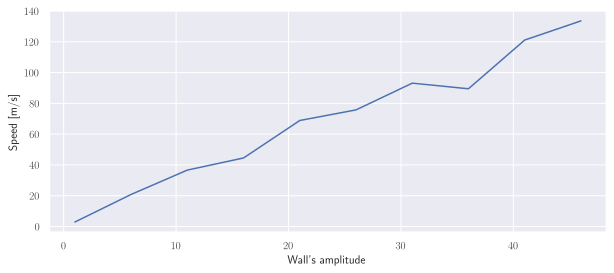

In [63]:
amps = np.arange(1, 50, 5)
variances = []
for amp in amps:
    for i in time[1:]:
        velocities[i] = v2_after(v1(i, amp), velocities[i-1])
    variances.append(velocities[300:].var())

plt.plot(amps, [np.sqrt(x) for x in variances])
plt.ylabel("Speed [m/s]")
plt.xlabel("Wall's amplitude")
plt.show()